In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [3]:
camvid = untar_data(URLs.CAMVID)
path_lbl = camvid/'labels'
path_img = camvid/'images'

In [4]:
path_vidFrames = camvid/'commaImages'

In [5]:
camvid.ls()

[PosixPath('/home/jupyter/.fastai/data/camvid/export.pkl'),
 PosixPath('/home/jupyter/.fastai/data/camvid/images'),
 PosixPath('/home/jupyter/.fastai/data/camvid/codes.txt'),
 PosixPath('/home/jupyter/.fastai/data/camvid/labels'),
 PosixPath('/home/jupyter/.fastai/data/camvid/valid.txt'),
 PosixPath('/home/jupyter/.fastai/data/camvid/commaImages'),
 PosixPath('/home/jupyter/.fastai/data/camvid/modelFinal.pkl')]

In [25]:
import cv2
vidcap = cv2.VideoCapture('/home/jupyter/.fastai/data/camvid/commaImages/train.mp4')

#/home/jupyter/.fastai/data/camvid/commaImages

In [30]:
success,image = vidcap.read()

In [31]:
count = 0

In [1]:
# while success:
#     # save frame as jpg file
#     cv2.imwrite("frame%d.jpg" % count, image)

#     success, image = vidcap.read()
#     print("read a new frame: ", success)
#     count += 1

In [ ]:
# /home/jupyter/.fastai/data/commaImages

In [8]:
codes = np.loadtxt(camvid/'codes.txt', dtype=str)

In [9]:
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [10]:
import skimage
import time

In [11]:
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

In [12]:
name2id = {v:k for k,v in enumerate(codes)}

In [72]:
name2id

{'Animal': 0,
 'Archway': 1,
 'Bicyclist': 2,
 'Bridge': 3,
 'Building': 4,
 'Car': 5,
 'CartLuggagePram': 6,
 'Child': 7,
 'Column_Pole': 8,
 'Fence': 9,
 'LaneMkgsDriv': 10,
 'LaneMkgsNonDriv': 11,
 'Misc_Text': 12,
 'MotorcycleScooter': 13,
 'OtherMoving': 14,
 'ParkingBlock': 15,
 'Pedestrian': 16,
 'Road': 17,
 'RoadShoulder': 18,
 'Sidewalk': 19,
 'SignSymbol': 20,
 'Sky': 21,
 'SUVPickupTruck': 22,
 'TrafficCone': 23,
 'TrafficLight': 24,
 'Train': 25,
 'Tree': 26,
 'Truck_Bus': 27,
 'Tunnel': 28,
 'VegetationMisc': 29,
 'Void': 30,
 'Wall': 31}

In [13]:
void_code = name2id['Void']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask] == target[mask]).float().mean()

In [14]:
learn= load_learner(camvid)

In [38]:
frames = get_image_files(path_vidFrames)

In [37]:
path_vidFrames.ls()

[PosixPath('/home/jupyter/.fastai/data/camvid/commaImages/frame7485.jpg'),
 PosixPath('/home/jupyter/.fastai/data/camvid/commaImages/frame17542.jpg'),
 PosixPath('/home/jupyter/.fastai/data/camvid/commaImages/frame19829.jpg'),
 PosixPath('/home/jupyter/.fastai/data/camvid/commaImages/frame6166.jpg'),
 PosixPath('/home/jupyter/.fastai/data/camvid/commaImages/frame16157.jpg'),
 PosixPath('/home/jupyter/.fastai/data/camvid/commaImages/frame14403.jpg'),
 PosixPath('/home/jupyter/.fastai/data/camvid/commaImages/frame2427.jpg'),
 PosixPath('/home/jupyter/.fastai/data/camvid/commaImages/frame13426.jpg'),
 PosixPath('/home/jupyter/.fastai/data/camvid/commaImages/frame7642.jpg'),
 PosixPath('/home/jupyter/.fastai/data/camvid/commaImages/frame1612.jpg'),
 PosixPath('/home/jupyter/.fastai/data/camvid/commaImages/frame13562.jpg'),
 PosixPath('/home/jupyter/.fastai/data/camvid/commaImages/frame19054.jpg'),
 PosixPath('/home/jupyter/.fastai/data/camvid/commaImages/frame13431.jpg'),
 PosixPath('/home

In [40]:
frames[:5]

[PosixPath('/home/jupyter/.fastai/data/camvid/commaImages/frame7485.jpg'),
 PosixPath('/home/jupyter/.fastai/data/camvid/commaImages/frame17542.jpg'),
 PosixPath('/home/jupyter/.fastai/data/camvid/commaImages/frame19829.jpg'),
 PosixPath('/home/jupyter/.fastai/data/camvid/commaImages/frame6166.jpg'),
 PosixPath('/home/jupyter/.fastai/data/camvid/commaImages/frame16157.jpg')]

In [56]:
img = open_image(path_vidFrames/'frame67.jpg')

In [57]:
# predict single image 
prediction = learn.predict(img)

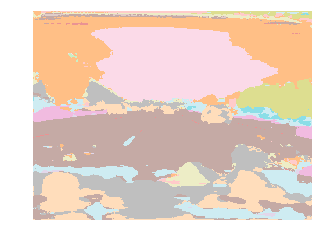

In [61]:
prediction[0].show(figsize=(5,5))

In [68]:
prediction[0].shape

torch.Size([1, 720, 960])

In [67]:
prediction[1].shape

torch.Size([1, 720, 960])

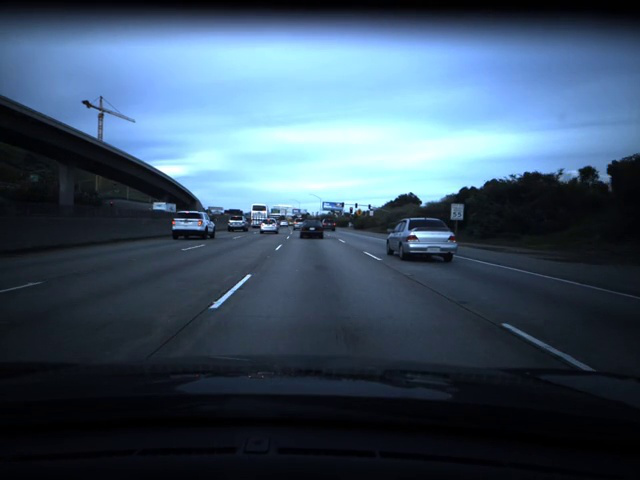

In [59]:
img

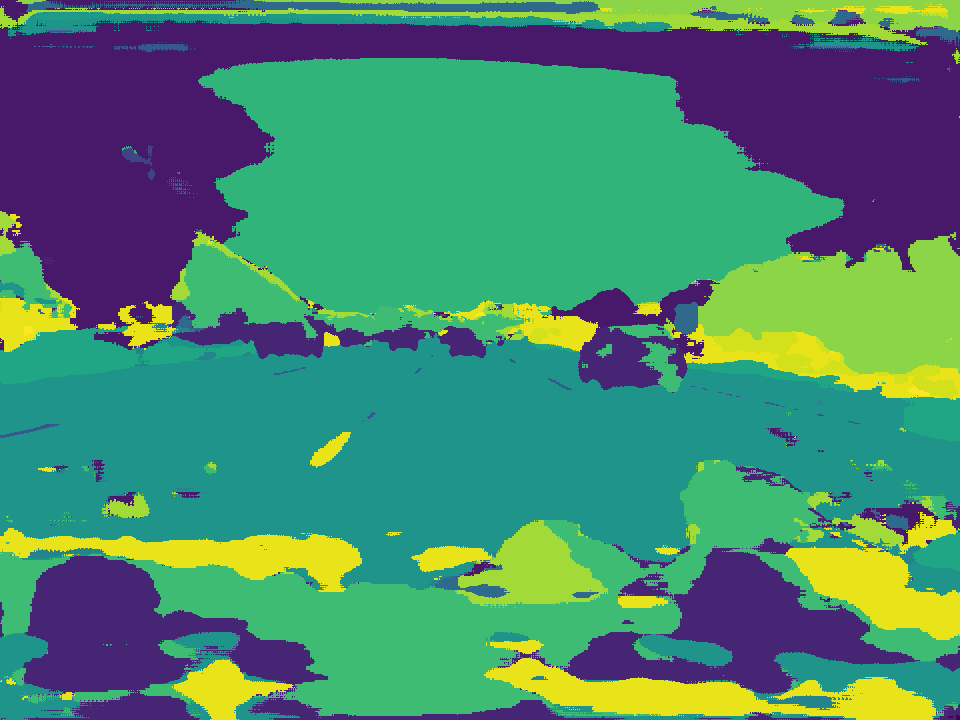

In [78]:
prediction[0].brightness()

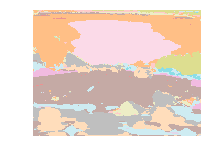

In [71]:
prediction[0].show()

In [50]:
type(prediction)

tuple

In [55]:
prediction.index

<function tuple.index(value, start=0, stop=9223372036854775807, /)>

In [74]:
??img.lighting